# Air expelling from a baloon

Split the image into color channels

Syntax:  b, g, r = cv2.split(img.astype(float))

 
Channel mix
  
Syntax: c1 = 1.5; c2 = -2; c3 = -0.1;    
isolated = c1 * g + c2 * b + c3 * r    
isolated = np.clip(isolated, 0, 255)    
isolated = isolated.astype(img.dtype)

Threshold the
mage    
ret, imgth = cv2.threshold(imgblur, 80, 255, cv2.THRESH_B
INARY)   
Detec
t edges    edge = cv2.Canny(imgth, 100
, 150)    
Find
contours    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


True
Frame 1: Contour Area = 150385.5, Contour Perimeter = 1472.947388768196


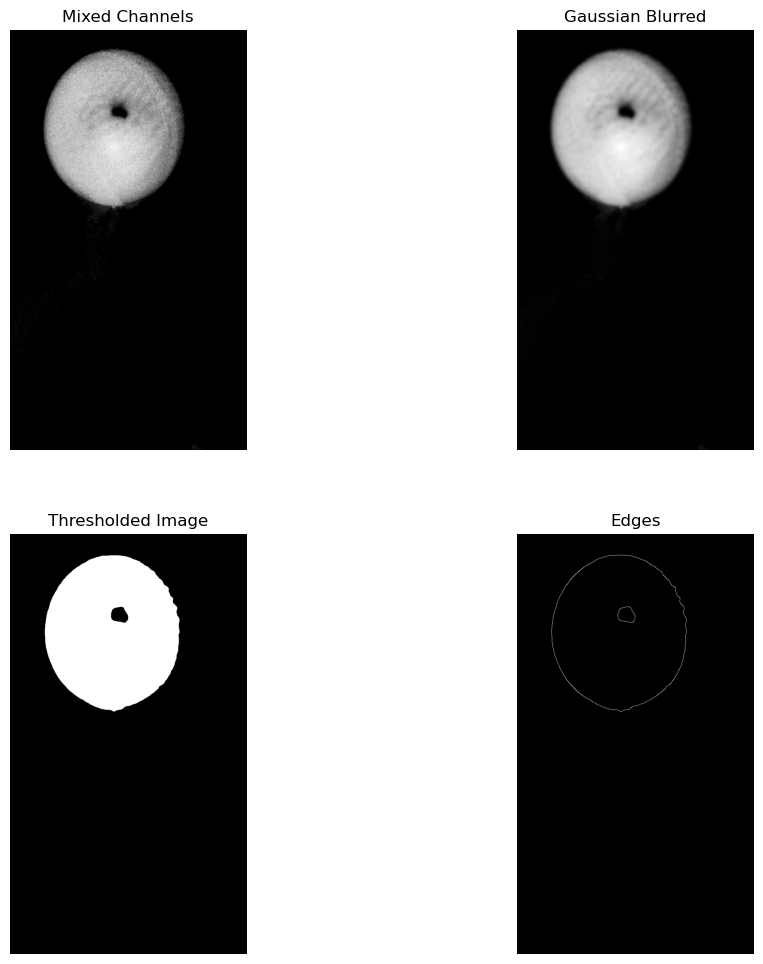

True
Frame 2: Contour Area = 150493.0, Contour Perimeter = 1476.160591840744


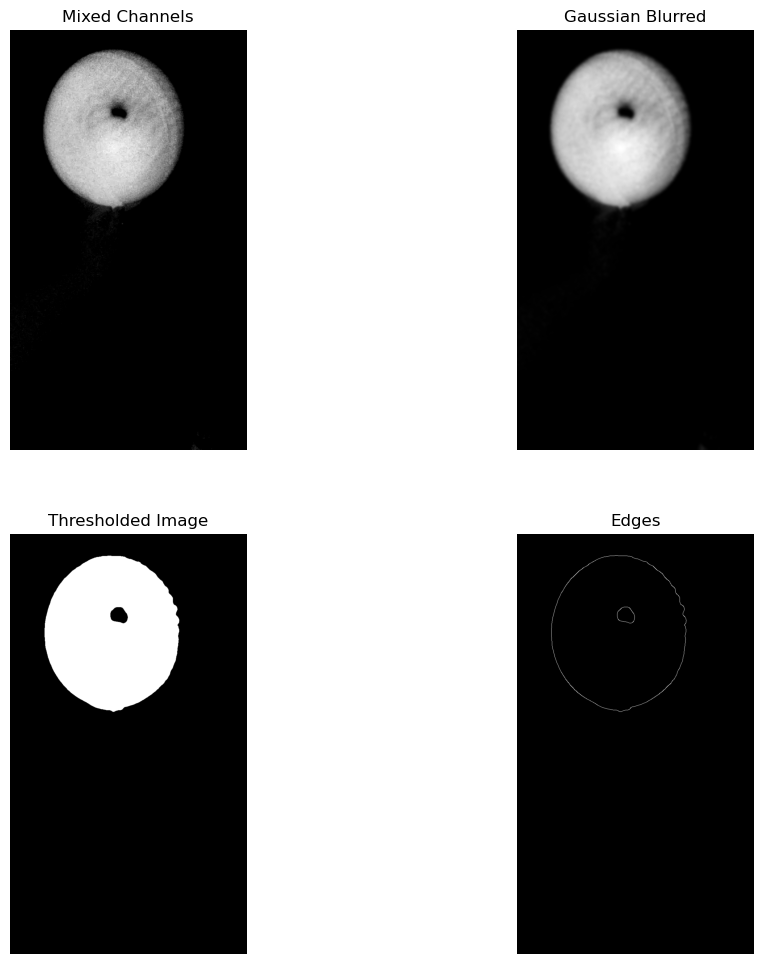

True
Frame 3: Contour Area = 150625.5, Contour Perimeter = 1482.6042429208755


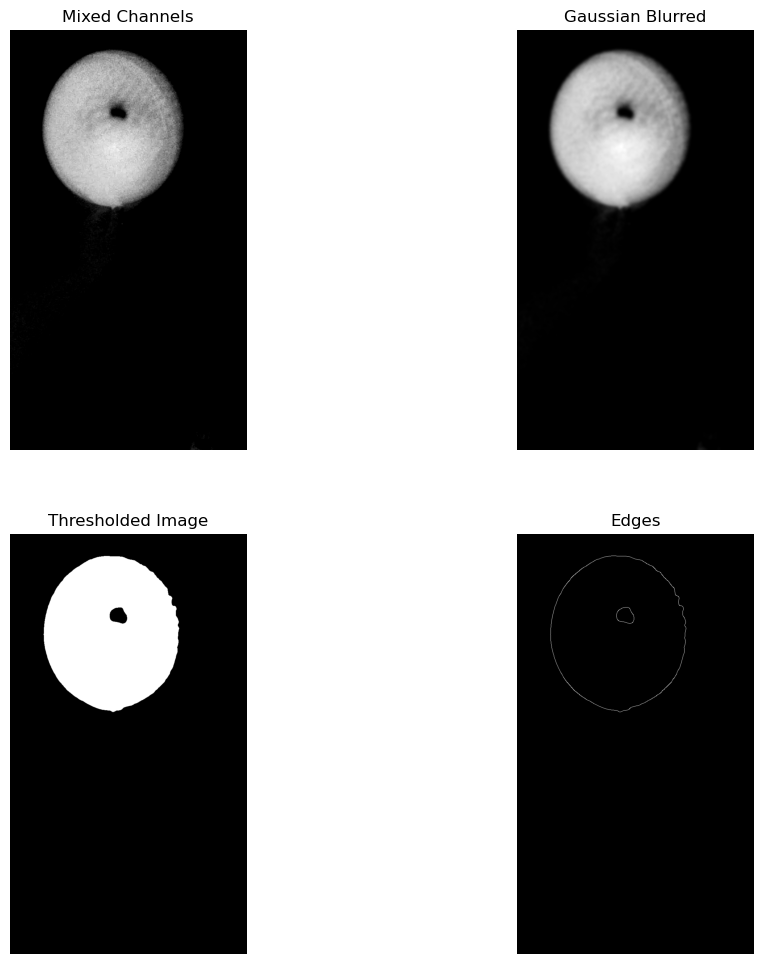

True
Frame 4: Contour Area = 152339.0, Contour Perimeter = 1482.0184564590454


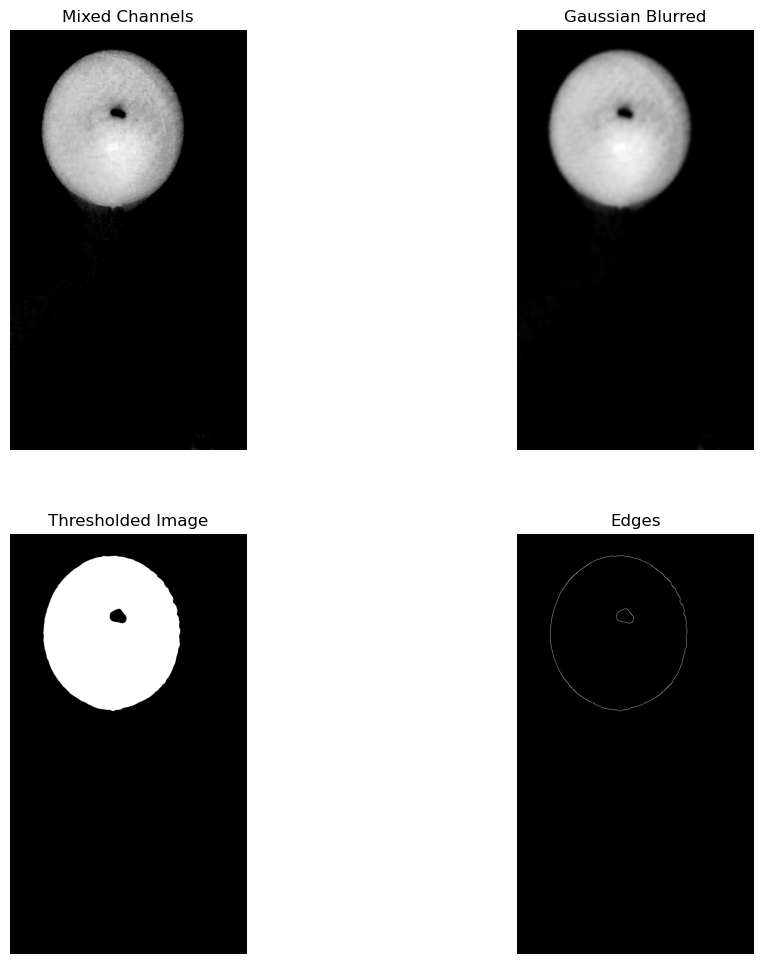

True
Frame 5: Contour Area = 152119.0, Contour Perimeter = 1476.7047481536865


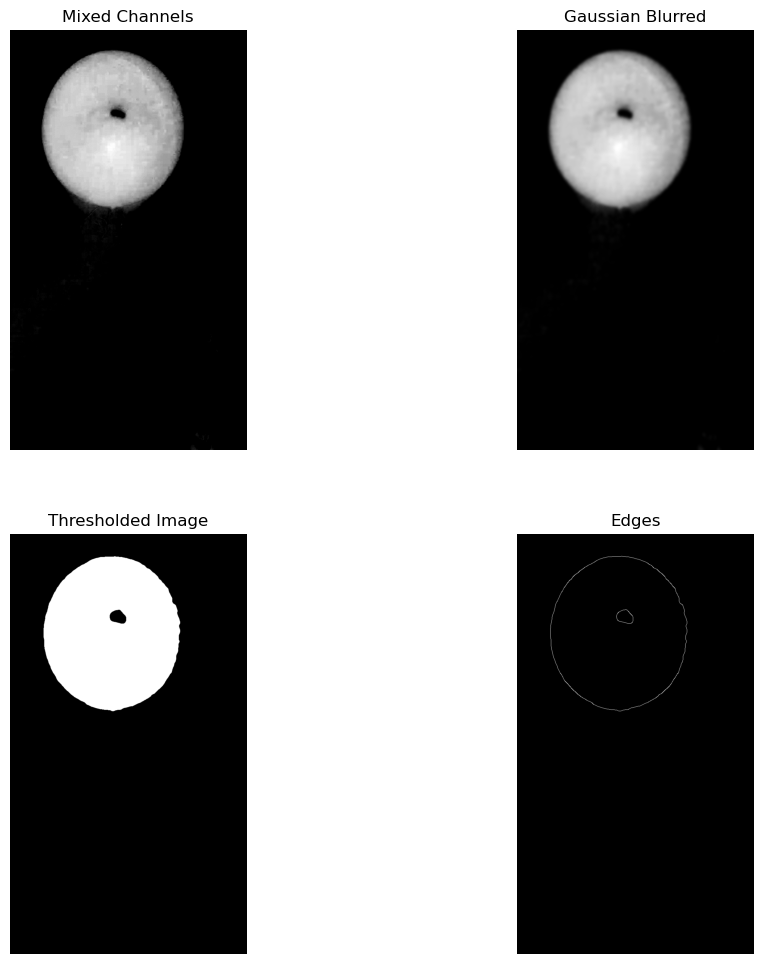

True


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter notebook using matplotlib
def display_image(image, title="Image", subplot=None):
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Capture video
vid = cv2.VideoCapture("balloon.mp4")

frame_count = 0  # Counter for limiting number of frames to process

while True:
    ret, img = vid.read()
    print(ret)

    # Break the loop if video ends or after 5 frames
    if not ret or frame_count >= 5:
        break

    # Split the image into color channels
    b, g, r = cv2.split(img.astype(float))

    # Channel mixing
    c1 = 1.5; c2 = -2; c3 = -0.1;
    isolated = c1 * g + c2 * b + c3 * r
    isolated = np.clip(isolated, 0, 255)
    isolated = isolated.astype(img.dtype)

    # Gaussian blur
    imgblur = cv2.GaussianBlur(isolated, (21, 21), 0)

    # Threshold the image
    ret, imgth = cv2.threshold(imgblur, 80, 255, cv2.THRESH_BINARY)

    # Detect edges
    edge = cv2.Canny(imgth, 100, 150)

    # Find contours
    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if contours:
        # Initialize the variable
        selectedcontour = contours[0].copy()  
        for contour in contours:
            if cv2.contourArea(contour) > 2000:
                selectedcontour = contour

        # Calculate contour area and perimeter
        ca = cv2.contourArea(selectedcontour)
        cl = cv2.arcLength(selectedcontour, True)

        # Print contour area and perimeter
        print(f"Frame {frame_count + 1}: Contour Area = {ca}, Contour Perimeter = {cl}")

        # Plot the processed results
        plt.figure(figsize=(12, 12))

        # Display the different stages as a 2x2 grid of images
        display_image(isolated, "Mixed Channels", subplot=221)
        display_image(imgblur, "Gaussian Blurred", subplot=222)
        display_image(imgth, "Thresholded Image", subplot=223)
        display_image(edge, "Edges", subplot=224)
        plt.show()

    frame_count += 1

vid.release()


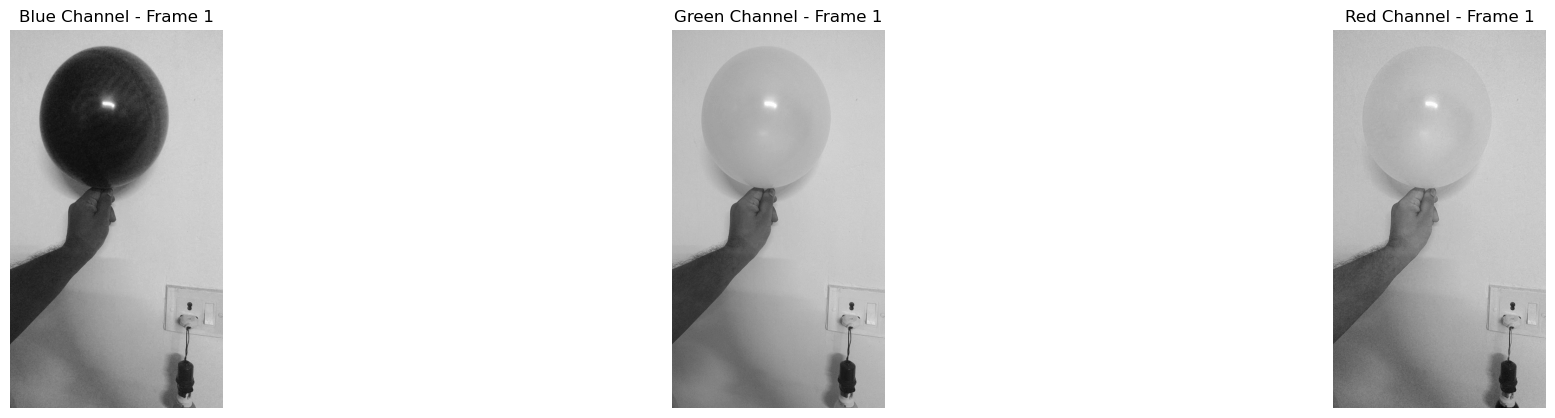

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter notebook using matplotlib
def display_image(image, title="Image", subplot=None):
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Capture video
vid = cv2.VideoCapture("balloon.mp4")

frame_count = 0  # Counter for limiting number of frames to process

plt.figure(figsize=(20, 20))  # Set up a figure for multiple images (3 channels per frame)

while True:
    ret, img = vid.read()

    # Break the loop if video ends or after 5 frames
    if not ret or frame_count >= 1:
        break

    # Split the image into color channels
    b, g, r = cv2.split(img)

    # Display each channel in the notebook
    display_image(b, title=f"Blue Channel - Frame {frame_count + 1}", subplot=531 + frame_count * 3)
    display_image(g, title=f"Green Channel - Frame {frame_count + 1}", subplot=532 + frame_count * 3)
    display_image(r, title=f"Red Channel - Frame {frame_count + 1}", subplot=533 + frame_count * 3)
    
    frame_count += 1

plt.tight_layout()
plt.show()

vid.release()


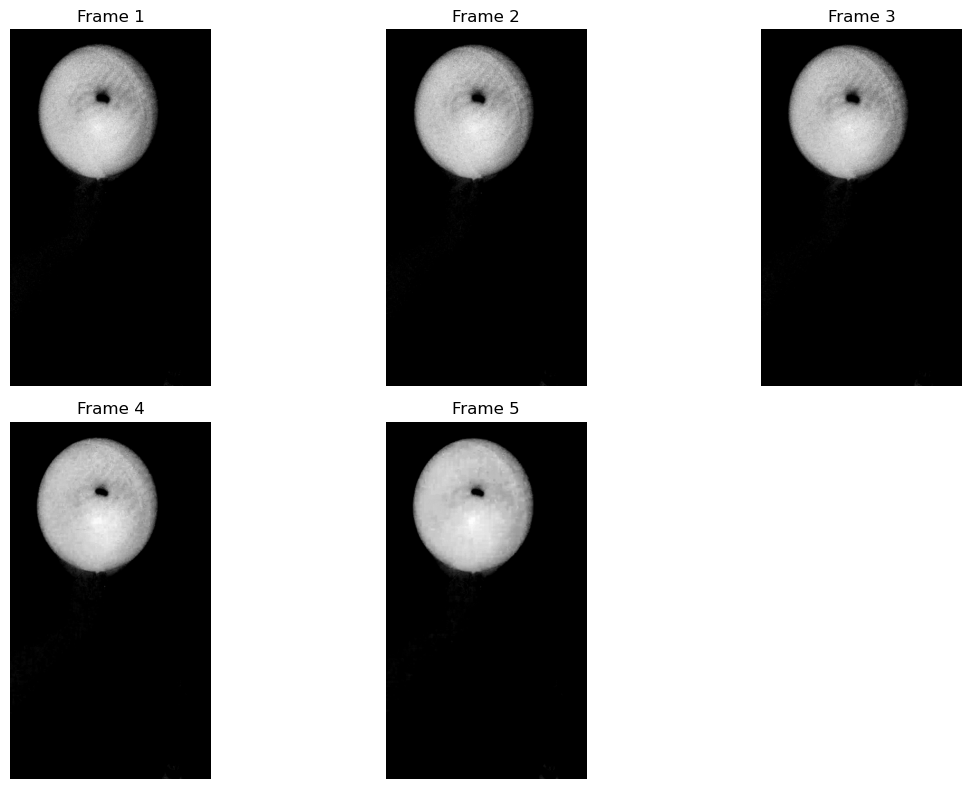

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter notebook using matplotlib
def display_image(image, title="Image", subplot=None):
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Capture video
vid = cv2.VideoCapture("balloon.mp4")

frame_count = 0  # Counter for limiting number of frames to process

plt.figure(figsize=(12, 8))  # Set up a figure for multiple images

while True:
    ret, img = vid.read()

    # Break the loop if video ends or after 5 frames
    if not ret or frame_count >= 5:
        break

    # Split the image into color channels
    b, g, r = cv2.split(img.astype(float))

    # Channel mixing
    c1 = 1.5; c2 = -2; c3 = -0.1;
    isolated = c1 * g + c2 * b + c3 * r
    isolated = np.clip(isolated, 0, 255).astype(np.uint8)  # Ensure valid image values

    # Display the result in the notebook
    display_image(isolated, title=f"Frame {frame_count + 1}", subplot=231 + frame_count)
    
    frame_count += 1

plt.tight_layout()
plt.show()

vid.release()


In [24]:
import cv2
import numpy as np

# Open the video file
vid = cv2.VideoCapture("balloon.mp4")

if not vid.isOpened():
    print("Error: Could not open video file.")
else:
    frame_count = 0

    while True:
        ret, img = vid.read()
        
        # Break the loop if no more frames are available
        if not ret:
            print("End of video reached or error reading frame.")
            break
        
        # Split channels and perform channel mixing
        b, g, r = cv2.split(img.astype(float))
        c1, c2, c3 = 1.5, -2, -0.1
        isolated = c1 * g + c2 * b + c3 * r
        isolated = np.clip(isolated, 0, 255).astype(img.dtype)

        # Apply Gaussian blur
        imgblur = cv2.GaussianBlur(isolated, (21, 21), 0)

        # Threshold the image
        _, imgth = cv2.threshold(imgblur, 80, 255, cv2.THRESH_BINARY)

        # Detect edges
        edge = cv2.Canny(imgth, 100, 150)

        # Find contours
        contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        # Initialize variables to hold the largest contour by area
        max_area = 2000
        selected_contour = None
        
        # Find the contour with area > 2000 (if any)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > max_area:
                selected_contour = contour
                max_area = area
        
        # If a valid contour is found, calculate area and perimeter
        if selected_contour is not None:
            ca = cv2.contourArea(selected_contour)
            cl = cv2.arcLength(selected_contour, True)
            print(f"Frame {frame_count} - Contour Area: {ca}, Contour Perimeter: {cl}")
        else:
            print(f"Frame {frame_count} - No valid contour found")

        frame_count += 1
        
        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    vid.release()
    cv2.destroyAllWindows()


Frame 0 - Contour Area: 150385.5, Contour Perimeter: 1472.947388768196
Frame 1 - Contour Area: 150493.0, Contour Perimeter: 1476.160591840744
Frame 2 - Contour Area: 150625.5, Contour Perimeter: 1482.6042429208755
Frame 3 - Contour Area: 152339.0, Contour Perimeter: 1482.0184564590454
Frame 4 - Contour Area: 152119.0, Contour Perimeter: 1476.7047481536865
Frame 5 - Contour Area: 151574.0, Contour Perimeter: 1477.1900293827057
Frame 6 - Contour Area: 151165.5, Contour Perimeter: 1481.4326699972153
Frame 7 - Contour Area: 150906.0, Contour Perimeter: 1475.047894001007
Frame 8 - Contour Area: 150866.0, Contour Perimeter: 1476.361602306366
Frame 9 - Contour Area: 150583.5, Contour Perimeter: 1477.4326699972153
Frame 10 - Contour Area: 150396.0, Contour Perimeter: 1471.5331752300262
Frame 11 - Contour Area: 150373.0, Contour Perimeter: 1474.8468835353851
Frame 12 - Contour Area: 150122.5, Contour Perimeter: 1481.7758158445358
Frame 13 - Contour Area: 149987.5, Contour Perimeter: 1476.462107

# Viscous fingering 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


vid = cv2.VideoCapture("visc.MOV");

while True:

    ret, img = vid.read()
    b, g, r = cv2.split(img.astype(float))

    # channel mixing
    c1 = -2.12; c2 = 0.245; c3 = 1.359;
    isolated = c1*g + c2*b + c3*r; 
    isolated = np.clip(isolated, 0, 255)
    isolated = isolated.astype(img.dtype)
    #cv2.imshow("mixed channel; before blurring", isolated)

    # gaussian blur
    imgblur = cv2.GaussianBlur(isolated, (21,21), 0);
    #cv2.imshow("After blurring", imgblur)

    # Thresholded the image
    ret, imgth = cv2.threshold(imgblur, 80, 255, cv2.THRESH_BINARY)
    #cv2.imshow("Thresholded image", imgth)
    
    edge = cv2.Canny(imgth, 100, 150);
    cv2.imshow("Edges of the image", edge);
    #cv2.waitKey(0)

    cv2.waitKey(1)

